

# Unbalanced dataset


## Problem Statement
Build a classifier model using the given dataset to predict the target classes:<br>
1. Choose two different models of your choice to solve the problem;<br>
2. Give a brief explanation of why you picked them;<br>
3. Compare and argue over the results of the models.<br>



***

# Contents
#### 1. Personal Details
#### 2. Exploratory analysis
#### 3. Machine Learning Models
#### 4. Machine Learning Tests
    4.1 Preparing Dataset for Machine Learning
    4.2 Removing outliers
    4.3 Principal Component Analysis (PCA) for Dimensionality Reduction
    4.4 Resampling datas for imbalanced datasets
    4.5 Train-Test Split for Evaluating Machine Learning Algorithms
    4.6 Feature Scaling
    4.7 Fitting the models
        4.7.1 KNN
        4.7.2 SVC
#### 5. Results
#### 6. Conclusions
#### 7. References

***
# 1. Personal Details
Rafael Ribeiro de Lima <br>
Linkedin: https://www.linkedin.com/in/rafarlima/ <br>
Lattes: http://lattes.cnpq.br/4980913573333282 <br>
Website: https://www.cienciadosdados.com.br/

***
# 2. Exploratory analysis

Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import random
from scipy import stats

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
df = pd.read_csv('./df_data.csv')

In [3]:
df.columns

Index(['x1', 'x2', 'x3', 'target'], dtype='object')

In [4]:
df.head()

,x1,x2,x3,target
0,2.71,10.39,-36.45,med
1,9.88,5.76,-54.63,med
2,82.87,1.73,0.83,med
3,12.99,10.40,-59.60,med
4,60.10,8.84,-45.87,med


The dataset consists of three columns with quantitative data (x1, x2, x3) and one qualitative column (target) with data classification.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   target  10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 312.6+ KB


The dataset is made up of a total of 10,000 entries. The Dtypes of each column are correct and you won't need to do any conversion.

In [6]:
df.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,42.669613,9.023236,-24.603198
std,25.597848,5.180151,20.138584
min,-19.500000,0.170000,-59.980000
25%,21.675000,5.260000,-41.920000
50%,42.940000,8.075000,-24.555000
75%,64.135000,11.730000,-7.080000
max,101.520000,43.080000,9.990000


In [7]:
print(df['target'].value_counts())

low     6000
high    3000
med     1000
Name: target, dtype: int64


The target column is made up of three sets of classes. Low class consists of 6,000 entries, high 3,000 and med 1,000.

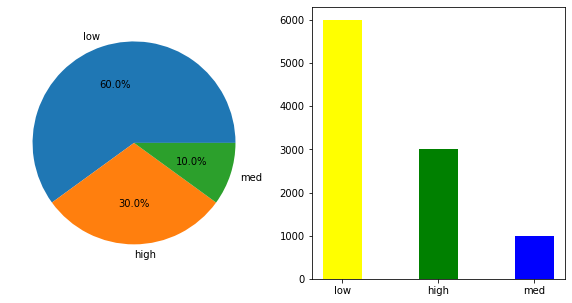

In [8]:
a = df['target'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(a.values, labels=a.index, autopct='%1.1f%%')
ax2.bar(a.index, a.values, color = ['yellow','green','blue'], width = 0.4)

plt.show()

We can observe that the data is unbalanced, that is, we have a dataset that has many examples of one class and few examples of the other class.<br>
In this situation, as we have a classification model, the result of this model will be biased, that is, it tends to classify the new data as being from the class that has more examples.<br>

In [9]:
# checking for null values
df.isnull().sum()

x1        0
x2        0
x3        0
target    0
dtype: int64

The dataset does not have null entries.

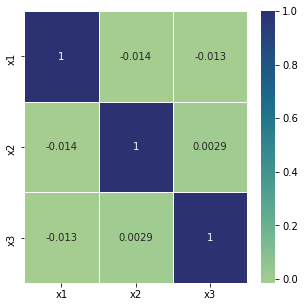

In [10]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

We can observe that, according to the correlation matrix, our data has a low linear relationship.


The correlation matrix shows the Pearson correlation values, which measure the degree of linear relationship between each pair of items or variables. Correlation values can range between -1 and +1.

Variables with correlation values greater than 0.7 are often considered highly correlated. If the two items tend to rise and fall together, the correlation value is positive.<br>

If items are not highly correlated, they may measure different characteristics or may not be clearly defined. <br>



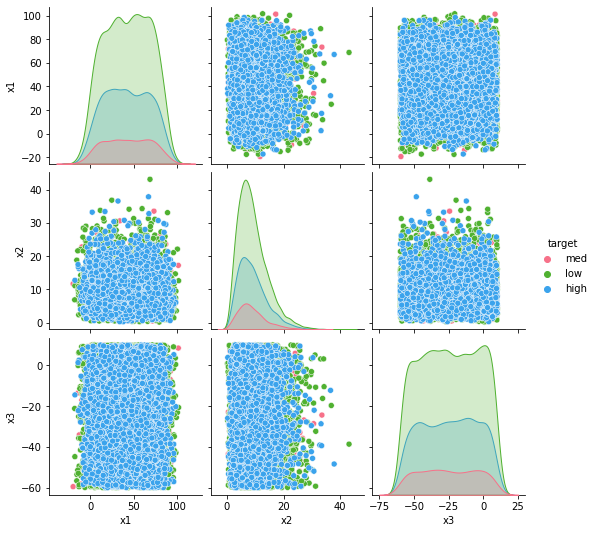

In [11]:
# Demonstrating the Sampling Distribuition
sns.pairplot (df [['target',
                   "x1", "x2" ,"x3"]] , hue = "target" ,diag_kind = 'kde', kind = 'scatter', palette = 'husl') 
plt.show ()

Here we present the data distribution graphs. There is data in column x2 that is outside the grouping. These data can be outliers.

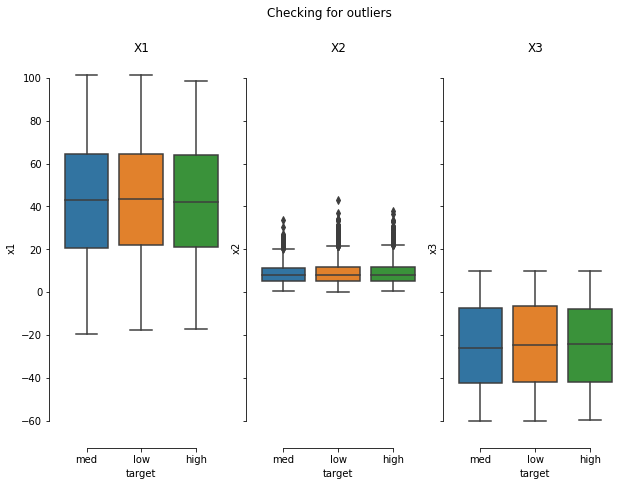

In [12]:
#Checking for outliers
fig, axes = plt.subplots(1, 3, figsize=(10, 7), sharey=True)
fig.suptitle('Checking for outliers')

# X1
sns.boxplot(ax=axes[0], x="target", y="x1", data=df)
axes[0].set_title("X1")

# X2
sns.boxplot(ax=axes[1], x="target", y="x2", data=df)
axes[1].set_title("X2")

# X3
sns.boxplot(ax=axes[2], x="target", y="x3", data=df)
axes[2].set_title("X3")

sns.despine(offset=10, trim=True)

As noted earlier and shown in the chart above, our dataset contains outliers in column x2. Outliers are points outside the curve. <br>

They are differentiated and atypical values, distinct from all others in the same series.
These data can interfere with learning our model and will be investigated.

***

# 3. Machine Learning Models

After exploratory data analysis, we were able to extract some information that helped in choosing the model. Our dataset contains 10,000 samples. The data is categorical, labeled, it is not text and our aim is to obtain the classification of the data.

In the scikit-learn package manual there is a cheat-sheet to help you choose. Following this map, the first tested model was the Linear SVC which didn't work right. I performed tests with more than 5 different models. I selected the KNeighbors and SVC models that achieved the best accuracy. Accuracy represents the fraction of correct predictions that the model made in the test set.

<img src= ./ml_map.png>
Choosing the right estimator [4]

***
# 4. Machine Learning Tests

To solve the problem with unbalanced data and low correlation, I looked for the state of the art. In the literature, some researches used the technique of Principal Component Analysis (PCA) for Dimensionality Reduction associated with Resampling datas for imbalanced datasets.

Mustafa, Nadir, et al., 2017 [2] They used the technique in a variety of biomedical data. According to them "The present analysis shows that the combined technique is more effective than other existing
approaches such as correlation based feature".

### 4.1 Preparing Dataset for Machine Learning

Some machine learning algorithms require categorical data to be turned into numbers. That's why we replace our classes with numbers. low 0, med 1 and high 2 respectively.

In [13]:
#transforms categorical data into 0, 1 and 2 to be accepted by the algorithm
df['target'] = df['target'].replace({'low':0, 'med':1, 'high':2})

In [14]:
X = df.drop('target',1)
y = df['target']

Our dataset has been split. One part kept the numerical data and the other its meanings.

### 4.2 Removing outliers (deprecated)

As we saw earlier, the presence of outliers was identified in our dataset. These outiliers can disrupt the training of our models. There are several techniques to deal with outliers such as Z-score, IQR score, data correction or just removal. After some tests I opted for removal. The models behaved better that way. <br>

Marshall, 2018 [1] "Data editing with elimination of outliers that includes removal of high and low values from two samples, respectively, can have significant effects on the occurrence of type 1 error. This type of data editing could have profound effects in high volume research fields, particularly in medicine".

In [15]:
df = df.drop(df.loc[df.x2 > 19.4].index)

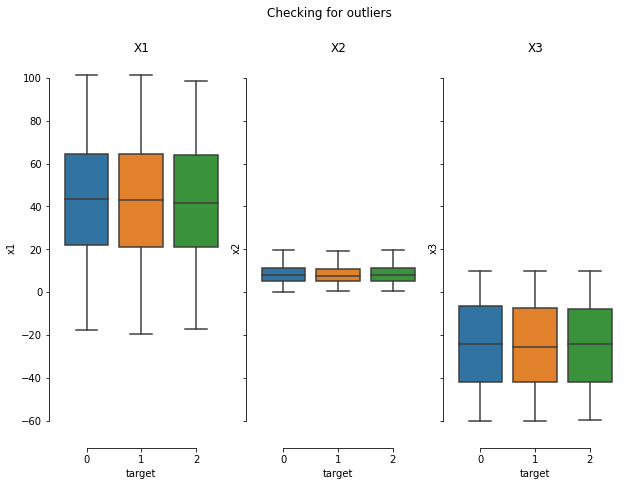

In [16]:
#Checking for outliers
fig, axes = plt.subplots(1, 3, figsize=(10, 7), sharey=True)
fig.suptitle('Checking for outliers')

# X1
sns.boxplot(ax=axes[0], x="target", y="x1", data=df)
axes[0].set_title("X1")

# X2
sns.boxplot(ax=axes[1], x="target", y="x2", data=df)
axes[1].set_title("X2")

# X3
sns.boxplot(ax=axes[2], x="target", y="x3", data=df)
axes[2].set_title("X3")

sns.despine(offset=10, trim=True)

### 4.3 Principal Component Analysis (PCA) for Dimensionality Reduction

Perhaps Principal Component Analysis (PCA) is the most popular technique for dimensionality reduction in machine learning. This technique comes from the field of linear algebra and can be used as a data preparation technique. It is often useful to reduce dimensionality by projecting the data into a lower-dimensional subspace that captures the “essence” of the data.

In [17]:
#Feature Scaling
p = MaxAbsScaler()
p.fit(X)
MaxAbsScaler(copy=True)
X = p.transform(X)

pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X = pd.DataFrame(X, columns=['x1','x2'])

### 4.4 Resampling datas for imbalanced datasets

This technique consists of generating synthetic data (not duplicated) of minority classes from neighbors. I used the RandomOverSampler[7] from the imblearn package.

According to the manual[7]:  "Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner".


In [18]:
ros = RandomOverSampler(sampling_strategy='all', random_state=42, shrinkage=None)
X, y = ros.fit_resample(X, y)

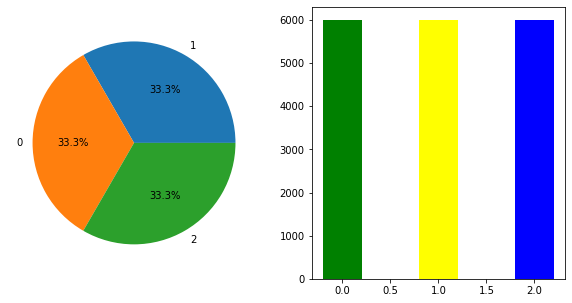

In [19]:
a = y.value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(a.values, labels=a.index, autopct='%1.1f%%')
ax2.bar(a.index, a.values, color = ['yellow','green','blue'], width = 0.4)

plt.show()

After resampling, all classes had 6,000 entries.

### 4.5 Train-Test Split for Evaluating Machine Learning Algorithms
To measure the actual performance of the created model, it is necessary to perform tests with it, for this we use different data from those presented in its training. <br>
Our datasets were divided into 80% (14400) for training and 20% (3600) for testing.

In [20]:
# Train-Test Split for Evaluating Machine Learning Algorithms
random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
[{'train': X_train.shape},{'test': X_test.shape}]

[{'train': (14400, 2)}, {'test': (3600, 2)}]

### 4.6 Feature Scaling

This important step will reduce the numerical scale of the columns so that they are all within the same value scale. If there are measurements with value scales that are very different from the distance calculated by the algorithm, the prediction will be influenced and may generate erroneous results.

In [21]:
# Feature Scaling
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

### 4.7 Fitting the models

At this stage, the models were adjusted, trained and the results calculated. They will be analyzed in the next chapter.

#### 4.7.1 KNN

In [22]:
# Tuning classifier to the Training set
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                  metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                                  weights='uniform')

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

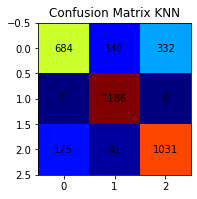

In [23]:
# Confusion matrix printing
conf_arr = confusion_matrix(y_test,y_pred)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix KNN")

plt.show()

In [24]:
# Model evaluation printing
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 80.58 %.


In [25]:
# Classification report printing
print(classification_report(y_test, y_pred, target_names=['low','med','high']))

              precision    recall  f1-score   support

         low       0.79      0.59      0.68      1156
         med       0.87      0.99      0.93      1197
        high       0.75      0.83      0.79      1247

    accuracy                           0.81      3600
   macro avg       0.80      0.80      0.80      3600
weighted avg       0.80      0.81      0.80      3600



#### 4.7.2 SVC

In [26]:
# Tuning classifier to the Training set
svclassifier = SVC(C=10000, kernel='rbf', gamma=180000, shrinking=True, 
                   probability=False, cache_size=200, class_weight=None, 
                   verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Fitting the model
svclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svclassifier.predict(X_test)

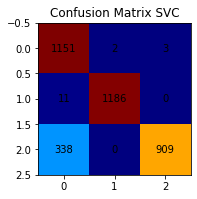

In [27]:
# Confusion matrix printing
conf_arr = confusion_matrix(y_test,y_pred)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix SVC")

plt.show()

In [28]:
# Model evaluation printing
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 90.17 %.


In [29]:
# Classification report printing
print(classification_report(y_test, y_pred, target_names=['low','med','high']))

              precision    recall  f1-score   support

         low       0.77      1.00      0.87      1156
         med       1.00      0.99      0.99      1197
        high       1.00      0.73      0.84      1247

    accuracy                           0.90      3600
   macro avg       0.92      0.91      0.90      3600
weighted avg       0.92      0.90      0.90      3600



***
# 5. Results


As we saw earlier. Accuracy represents the fraction of correct predictions that the model made in the test set.

The SVC model obtained an accuracy of 90.17% against KNN's 80.58.

The f1-score metric represents the harmonic mean of the precision and recall metrics (See Classification Report in the previous chapter), we can see that both models are not interpreting the low and high classes very well.

In the confusion matrix (tables below) the crossings of the predictions in the test set are represented. Diagonal data (upper left corner to lower right corner) represent hits and other wrong prediction data. We can observe that the SVC model obtained a greater number of correct answers.

In both tables, in the lower left corner, we can see that the class that made the most mistakes was the low being confused with high. This explains the F1-Score values. We can also observe that SVC had almost no misclassification in the other classes.

We then concluded that the SVC model obtained a better prediction than the KNN model.

<table align=left>
  <tr>
    <td><img src="./matrix_KNN.png"></td>
    <td><img src="./matrix_svc.png"></td>
  </tr>
 </table>

***
# 6. Conclusions

* Unbalanced data gets in the way of the results, but this problem can be worked around with Feature Scaling.
* Low correlation data can be used in machine learning with the help of PCA.
* Removing outliers improved model learning.
* The use of PCA and Feature Scaling proved to be efficient.
* The SVC model had better data prediction with an accuracy of 90.17% versus 80.58% for the KNN.

***
# 7. References

1. Marshall University, et al. “Effect of Removing Outliers on Statistical Inference: Implications to Interpretation of Experimental Data in Medical Research”. Marshall Journal of Medicine, vol. 4, no 2, abril de 2018. DOI.org (Crossref), doi:10.18590/mjm.2018.vol4.iss2.9.


2. Mustafa, Nadir, et al. “A Classification Model for Imbalanced Medical Data Based on PCA and Farther Distance Based Synthetic Minority Oversampling Technique”. International Journal of Advanced Computer Science and Applications, vol. 8, no 1, 2017. DOI.org (Crossref), doi:10.14569/IJACSA.2017.080109.


3. Rani, K. Usha, et al. “Performance of synthetic minority oversampling technique on imbalanced breast cancer data”. 2016 3rd International Conference on Computing for Sustainable Global Development (INDIACom), 2016, p. 1623–27.


4. Choosing the right estimator — scikit-learn 0.24.2 documentation. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. Accessed 23/jul/2021.


5. sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.24.2 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. Accessed 23/jul/2021.


6. sklearn.svm.SVC — scikit-learn 0.24.2 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. Accessed 23/jul/2021.


7. RandomOverSampler — Version 0.8.0. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html. Accessed 23/jul/2021.